In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data.csv')

Starting gradient descent at m = 0, c = 0, error = 5565.107834490553
0  Cost:  1484.5865573886724
1  Cost:  457.8542575549246
2  Cost:  199.5099857089966
3  Cost:  134.50591056654892
4  Cost:  118.14969340734379
5  Cost:  114.03414904545866
6  Cost:  112.99857730225538
7  Cost:  112.73798186081584
8  Cost:  112.67238434422576
9  Cost:  112.65585180013326
10  Cost:  112.6516648827319
11  Cost:  112.65058434663722
12  Cost:  112.65028543215112
13  Cost:  112.65018318807572
14  Cost:  112.65013043020801
15  Cost:  112.65009012436488
16  Cost:  112.65005295208229
17  Cost:  112.65001656866778
18  Cost:  112.64998038415453
19  Cost:  112.64994425009652
20  Cost:  112.64990812914196
21  Cost:  112.64987201189253
22  Cost:  112.6498358959833
23  Cost:  112.64979978081935
24  Cost:  112.64976366625088
25  Cost:  112.64972755224022
26  Cost:  112.649691438778
27  Cost:  112.64965532586166
28  Cost:  112.64961921349061
29  Cost:  112.6495831016649
30  Cost:  112.64954699038412
31  Cost:  112.649

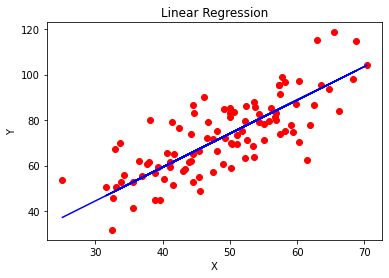

In [2]:
# implement the linear regression model from scratch using parameters m and c and using the gradient descent algorithm using MSE loss function
def gradient_descent(x, y, m, c, learning_rate, num_iterations):
    for i in range(num_iterations):
        m, c = step_gradient(x, y, m, c, learning_rate)
        print(i, " Cost: ", cost(x, y, m, c))
    return m, c

def step_gradient(x, y, m, c, learning_rate):
    m_gradient = 0
    c_gradient = 0
    N = float(len(x))
    for i in range(len(x)):
        m_gradient += (2/N) * x[i] * ((m * x[i] + c) - y[i])
        c_gradient += (2/N) * ((m * x[i] + c) - y[i])
    m = m - (learning_rate * m_gradient)
    c = c - (learning_rate * c_gradient)
    return m, c

def cost(x, y, m, c):
    N = float(len(x))
    cost = 0
    for i in range(len(x)):
        cost += (1/N) * ((m * x[i] + c) - y[i])**2
    return cost

# implement the linear regression model using the above defined functions
x = dataset['x']
y = dataset['y']

m = 0
c = 0
learning_rate = 0.0001
num_iterations = 1000

print("Starting gradient descent at m = {0}, c = {1}, error = {2}".format(m, c, cost(x, y, m, c)))
m, c = gradient_descent(x, y, m, c, learning_rate, num_iterations)
print("After {0} iterations m = {1}, c = {2}, error = {3}".format(num_iterations, m, c, cost(x, y, m, c)))

# plot the graph for the dataset and the linear regression model
plt.scatter(x, y, color = 'red')
plt.plot(x, m*x + c, color = 'blue')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

1.3224310226878686 7.991020985734423


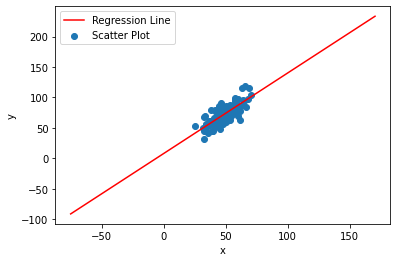

In [3]:
# Predict the best fit line using the ordinary least squares method
# calculate the mean of x and y
mean_x = np.mean(dataset['x'])
mean_y = np.mean(dataset['y'])

# calculate the total number of values
n = len(dataset['x'])

# use the formula to calculate the b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (dataset['x'][i] - mean_x) * (dataset['y'][i] - mean_y)
    denom += (dataset['x'][i] - mean_x) ** 2

b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# print the coefficients
print(b1, b0)

# plot the dataset and the best fit line
max_x = np.max(dataset['x']) + 100
min_x = np.min(dataset['x']) - 100

# calculate line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# plot the line
plt.plot(x, y, color='red', label='Regression Line')
# plot the dataset
plt.scatter(dataset['x'], dataset['y'], label='Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()